In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing modules and libraries for audio processings

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

## Loading datasets

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #storing path of audio files
        paths.append(os.path.join(dirname,filename))
        #storing names of files label
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        #print(label.lower())
        #print(os.path.join(dirname, filename))
print('DataSet is Loaded')

DataSet is Loaded


## VIEWING DATASETS

In [4]:
#paths[:5]

In [5]:
#lables[:5]

In [6]:
df = pd.DataFrame()
df['voice'] = paths
df['label'] = labels
#print(df.head(10))
values = df.iloc[:,1].value_counts()
values = np.array(values)

#print(values)
emo = df.iloc[:,1]
emo = emo.unique()
print(emo)

df2 = pd.DataFrame()
df2['emotion'] = emo
df2['count'] = values
#print(df2)

['fear' 'angry' 'disgust' 'neutral' 'sad' 'ps' 'happy']


## Exploring dataset analysis

<AxesSubplot:xlabel='emotion', ylabel='count'>

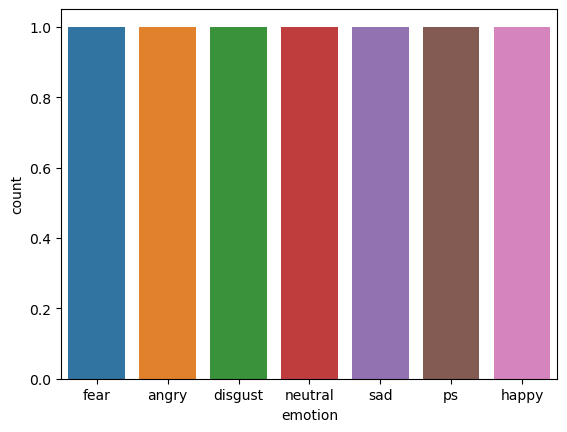

In [7]:
sns.countplot(x=df2['emotion'],data =df2['count'])

In [8]:
def waveplot(data ,samplerate ,emotion):
    plt.figure(figsize=(20,8))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=samplerate)
    plt.show()  

In [9]:
def spectogram(data ,sr ,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(20,8))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr =sr,x_axis='time',y_axis='hz')
    plt.colorbar()

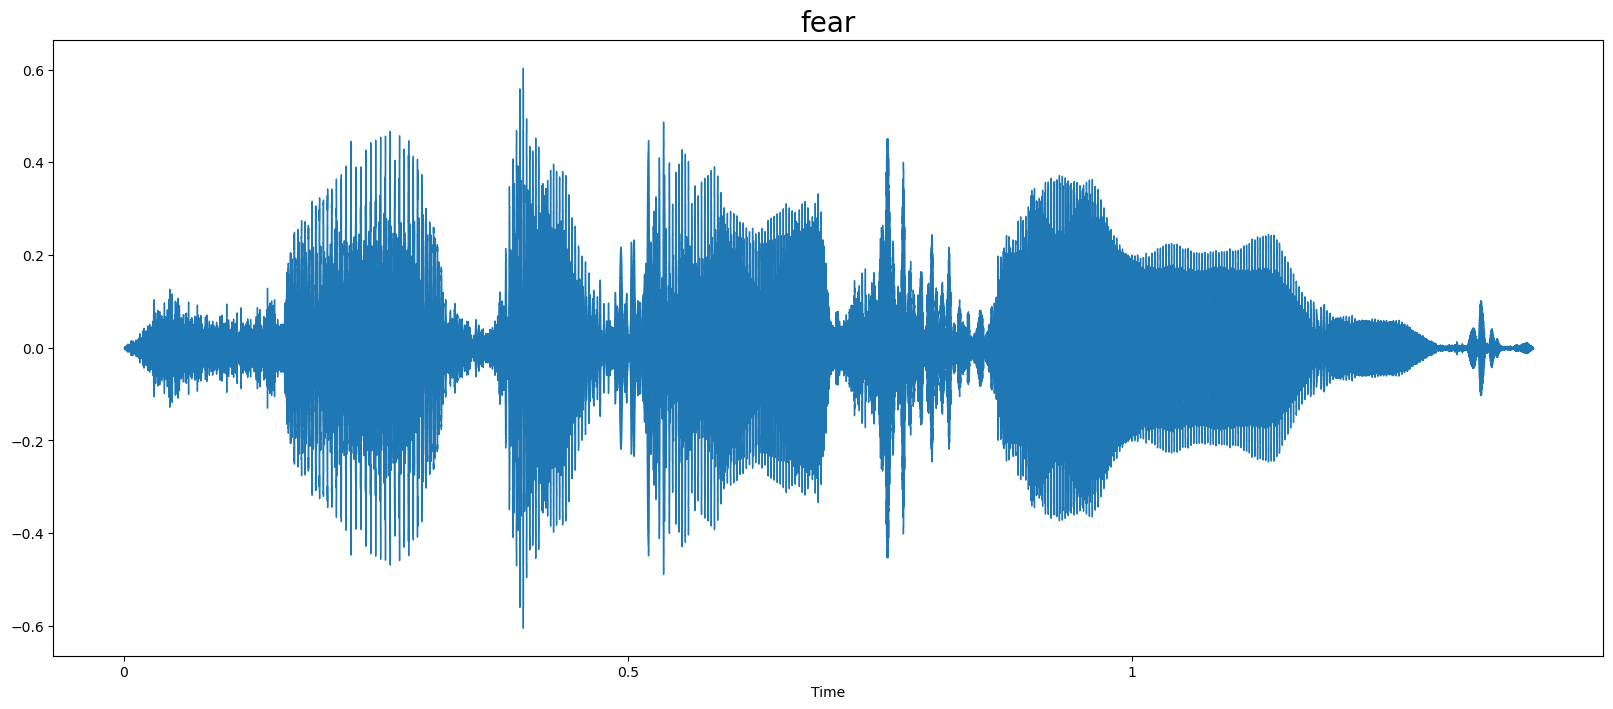

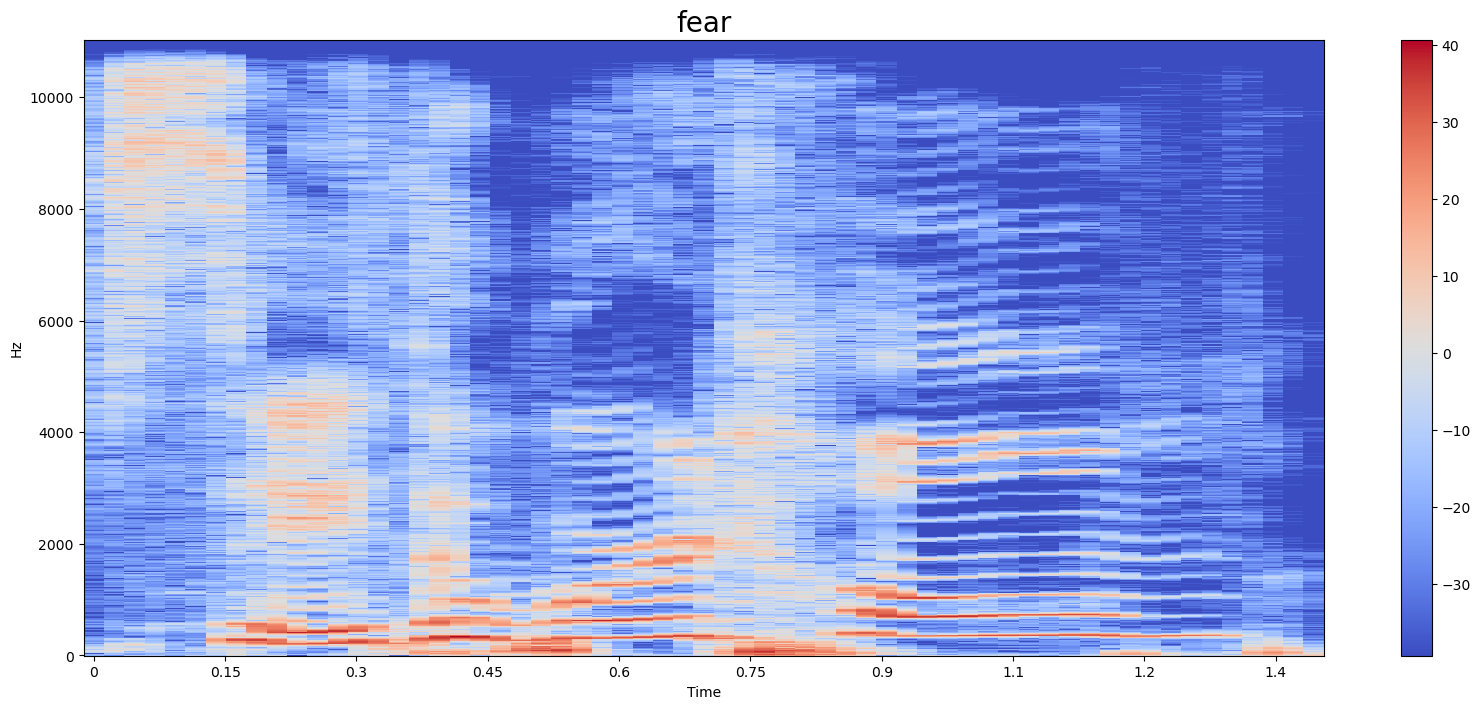

In [10]:
emotion = 'fear'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

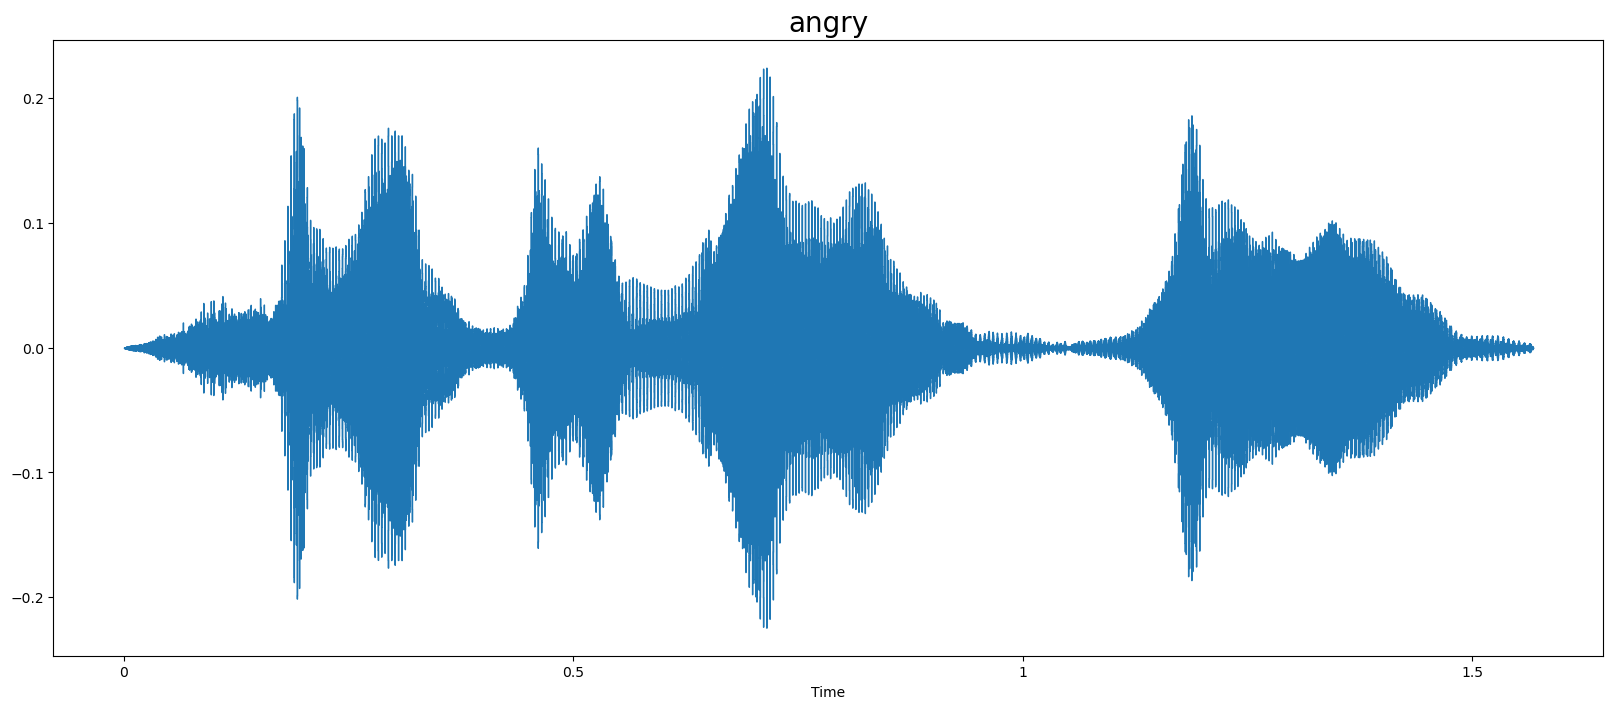

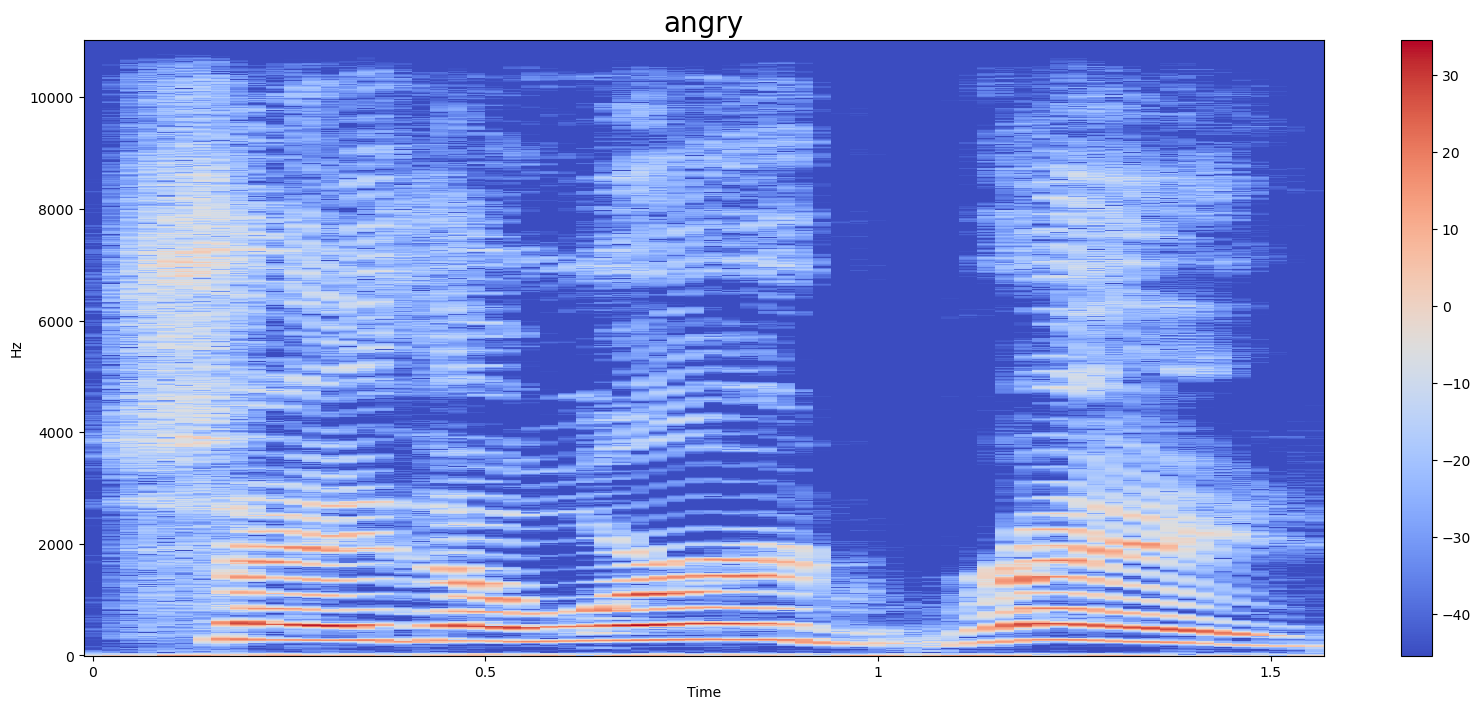

In [11]:
emotion = 'angry'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

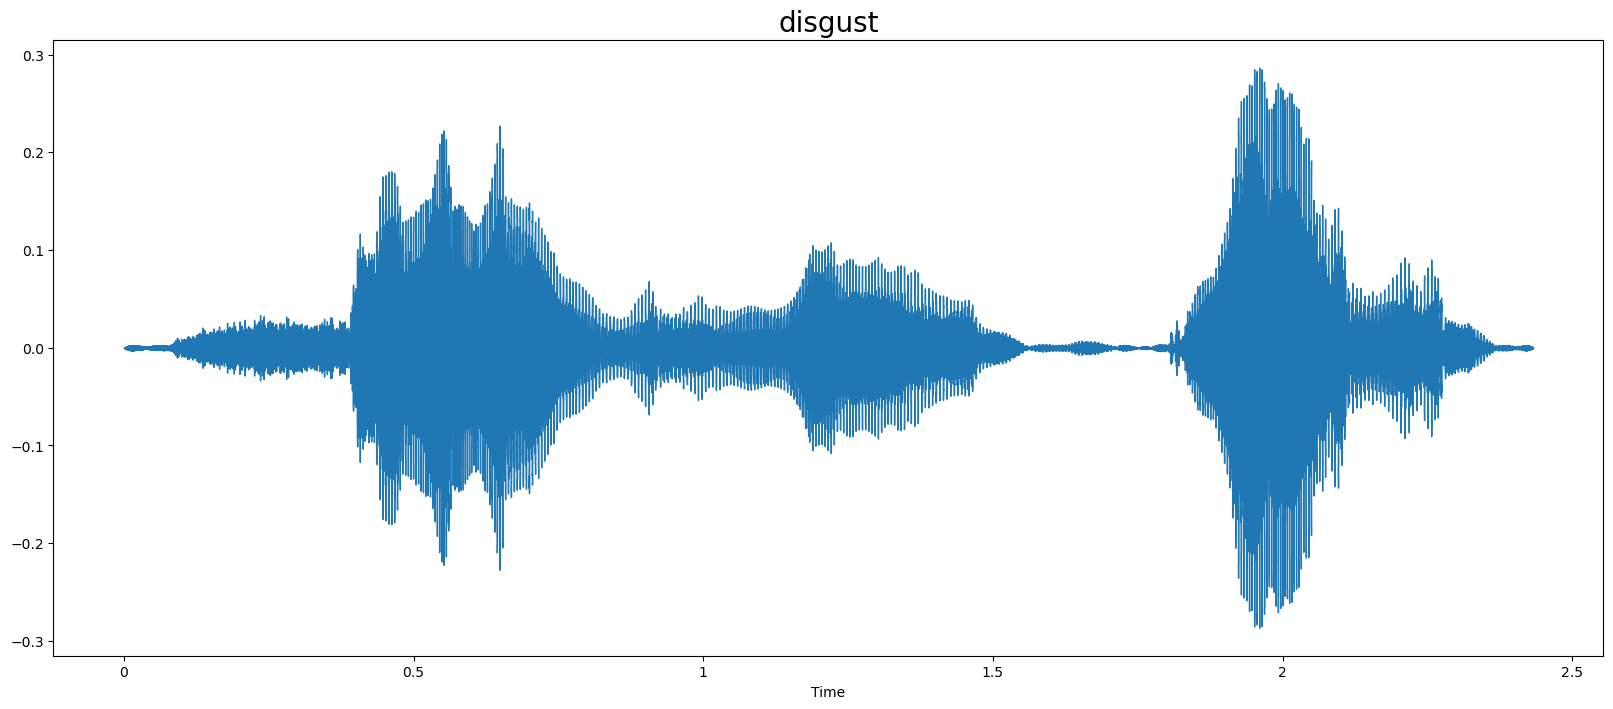

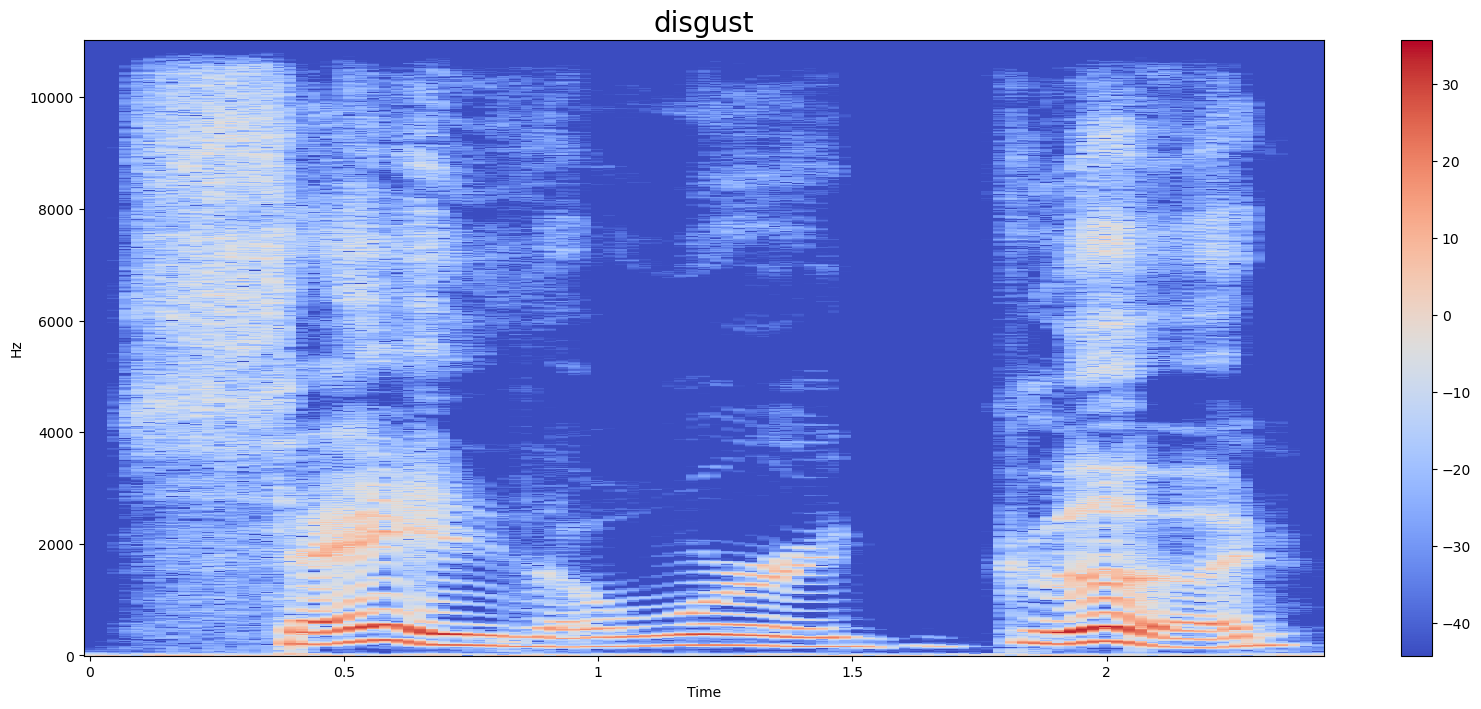

In [12]:
emotion = 'disgust'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

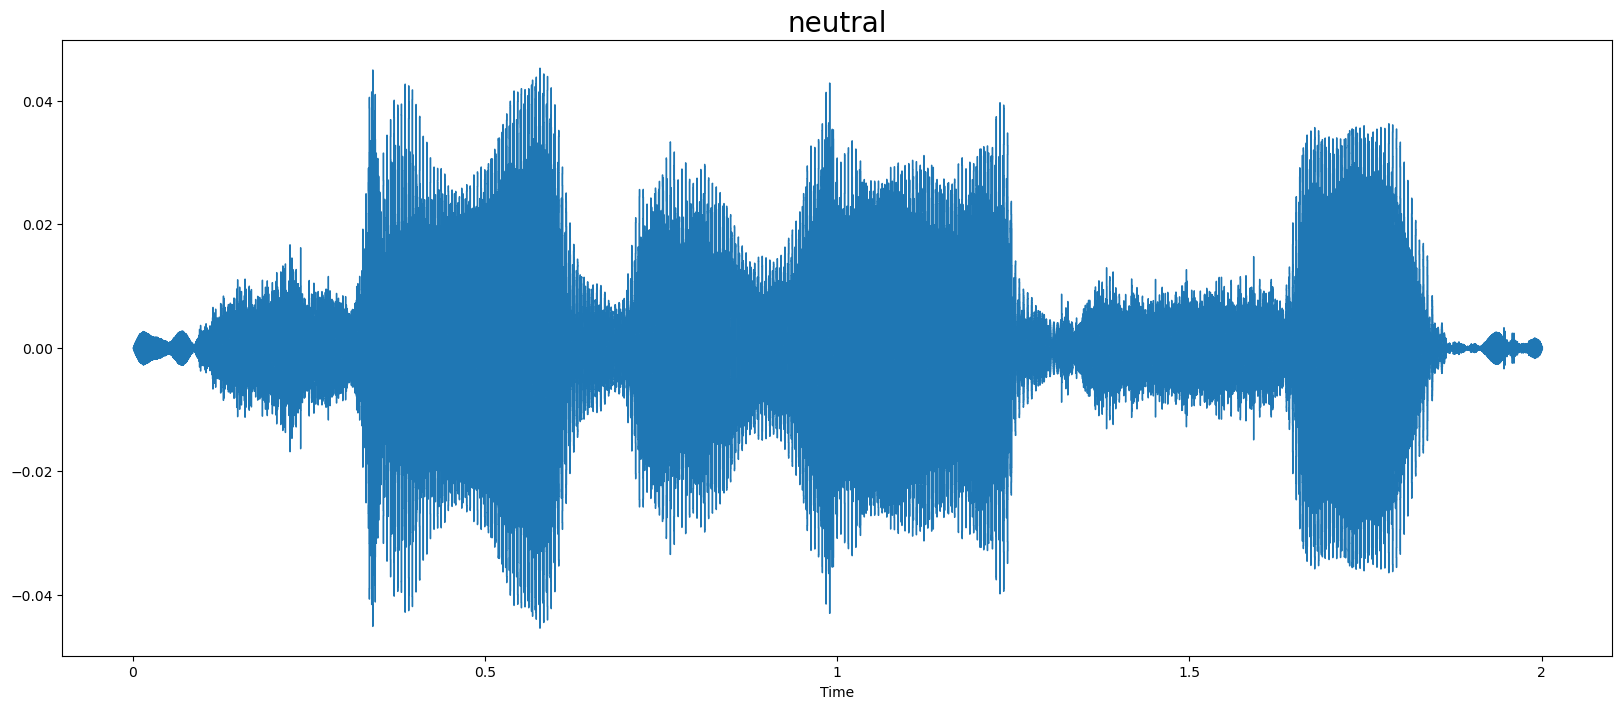

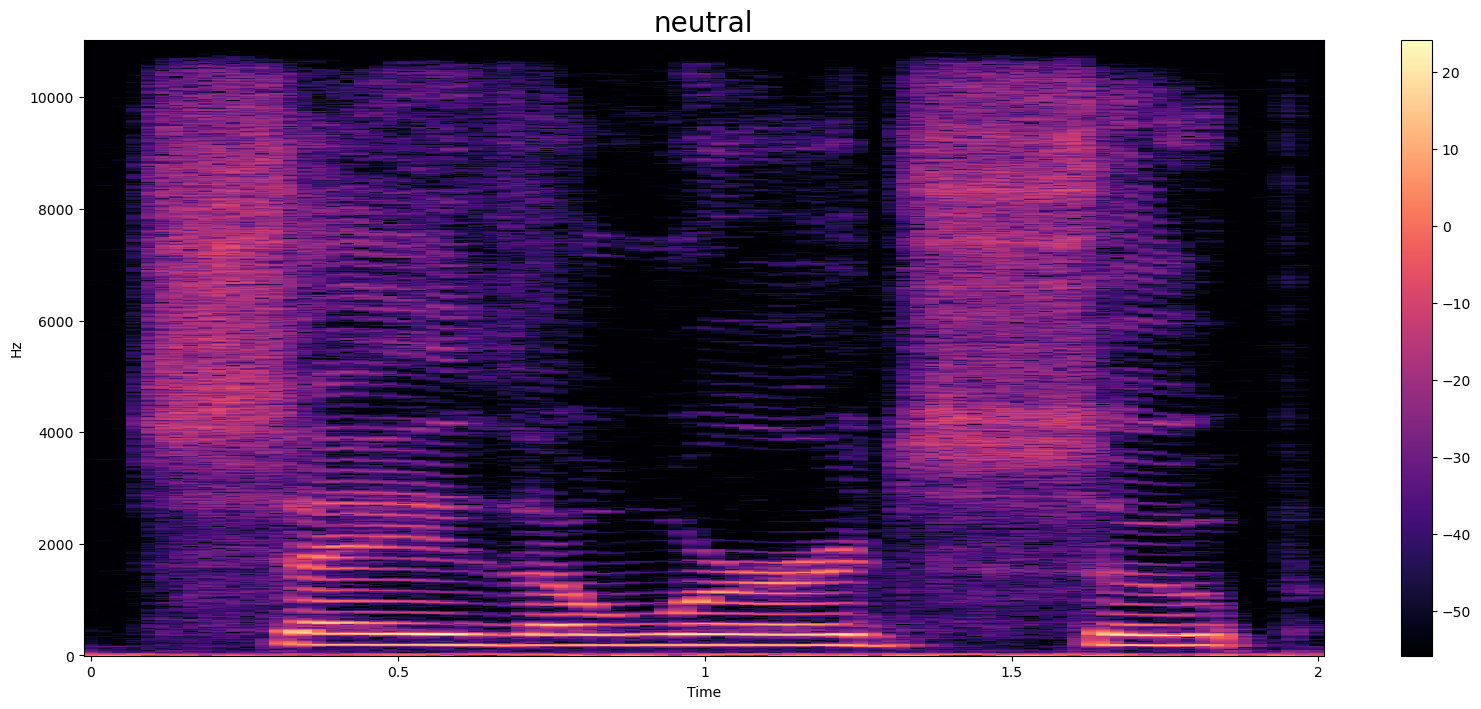

In [13]:
emotion = 'neutral'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

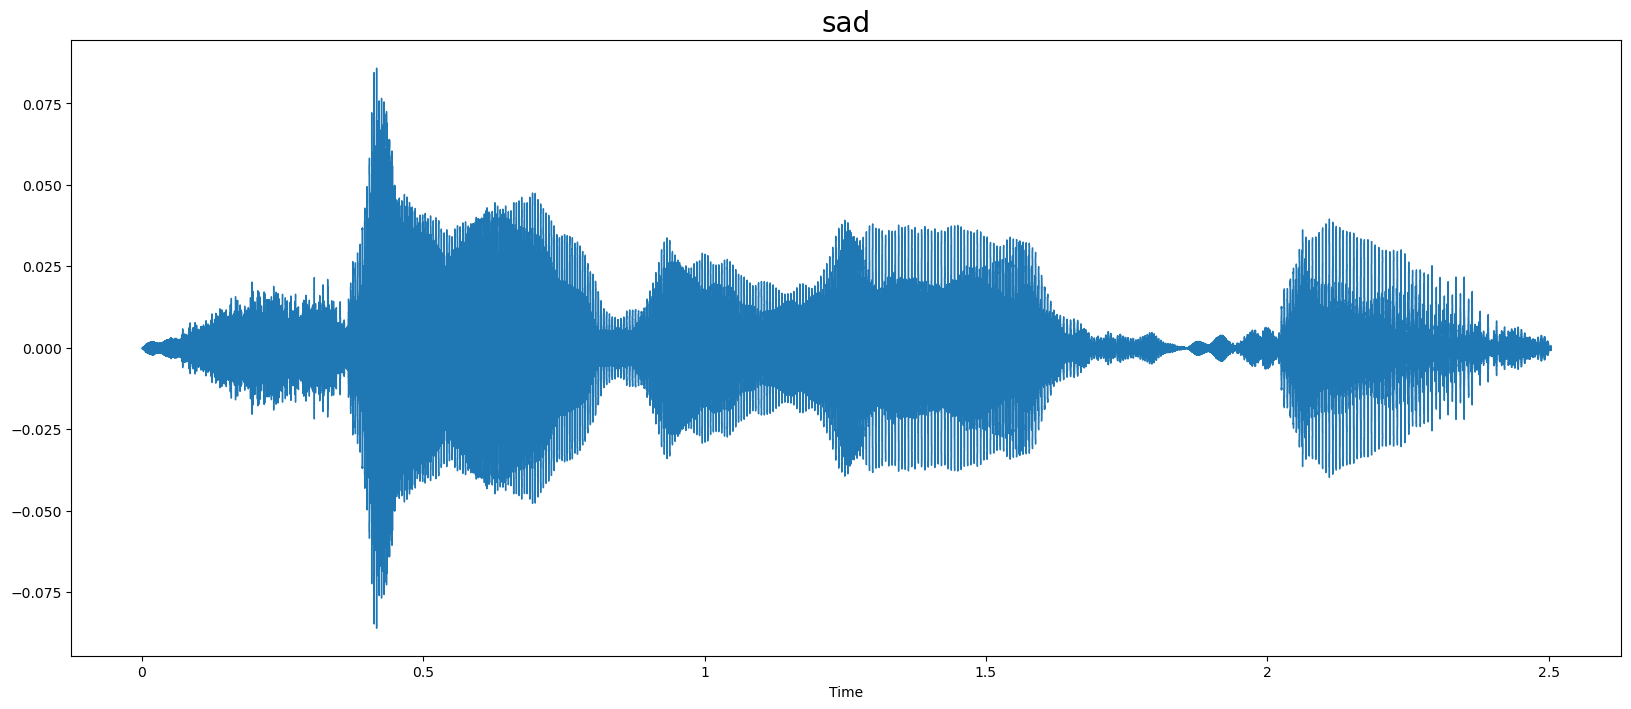

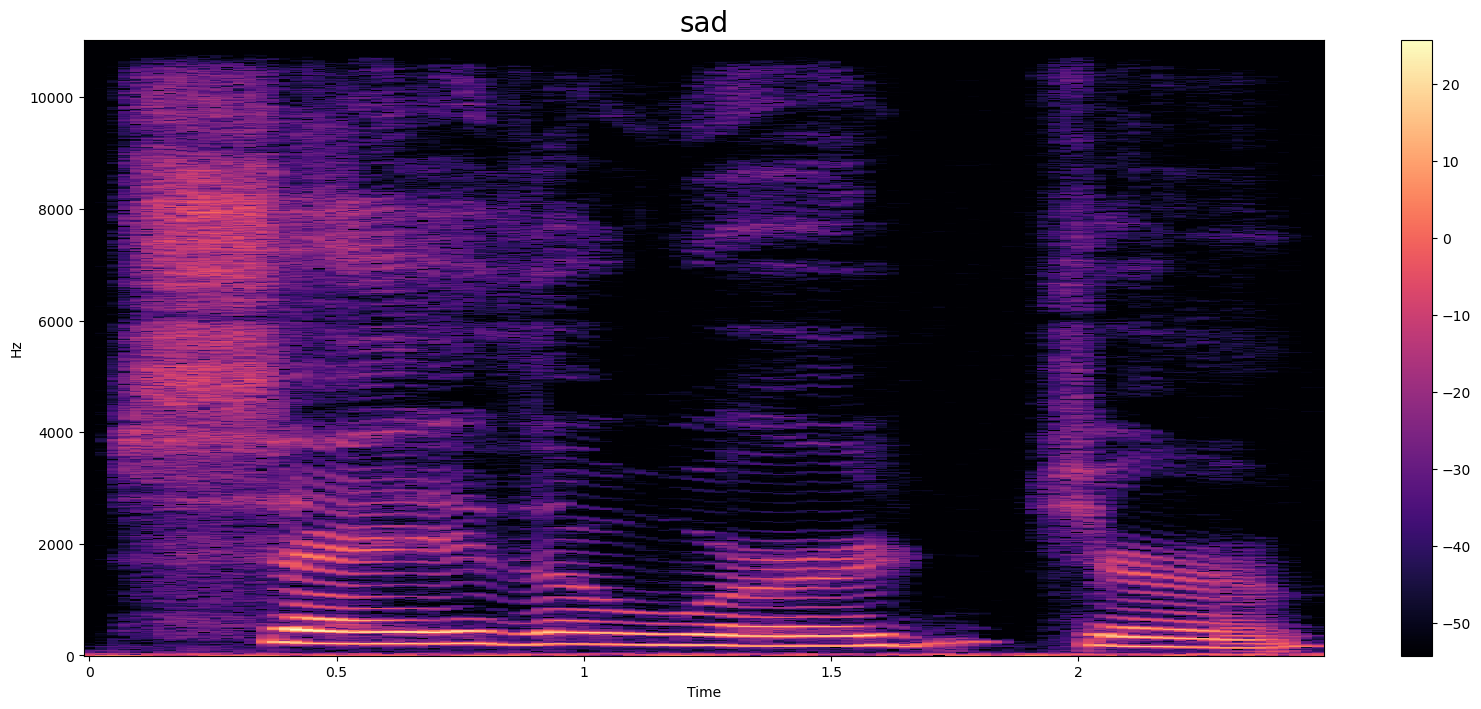

In [14]:
emotion = 'sad'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

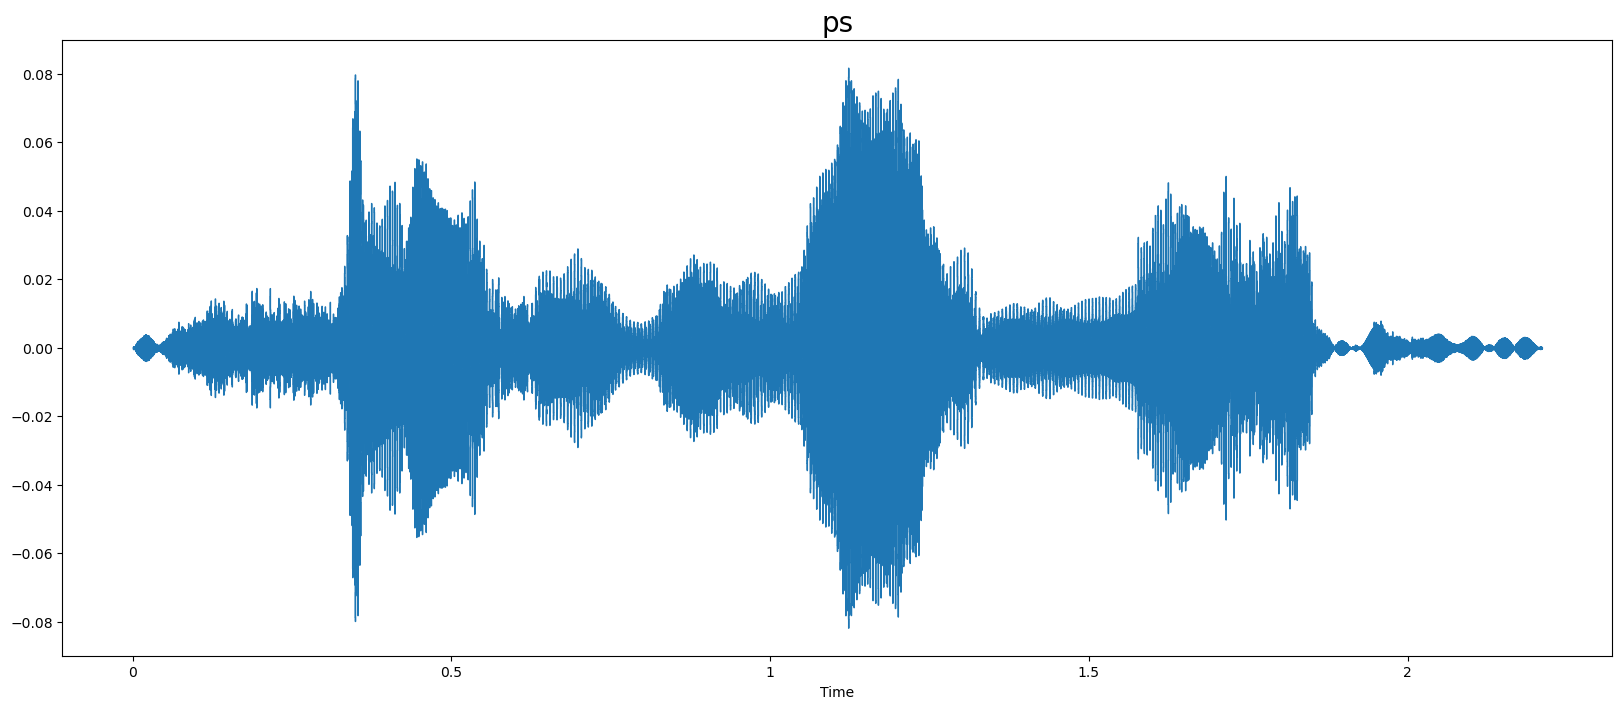

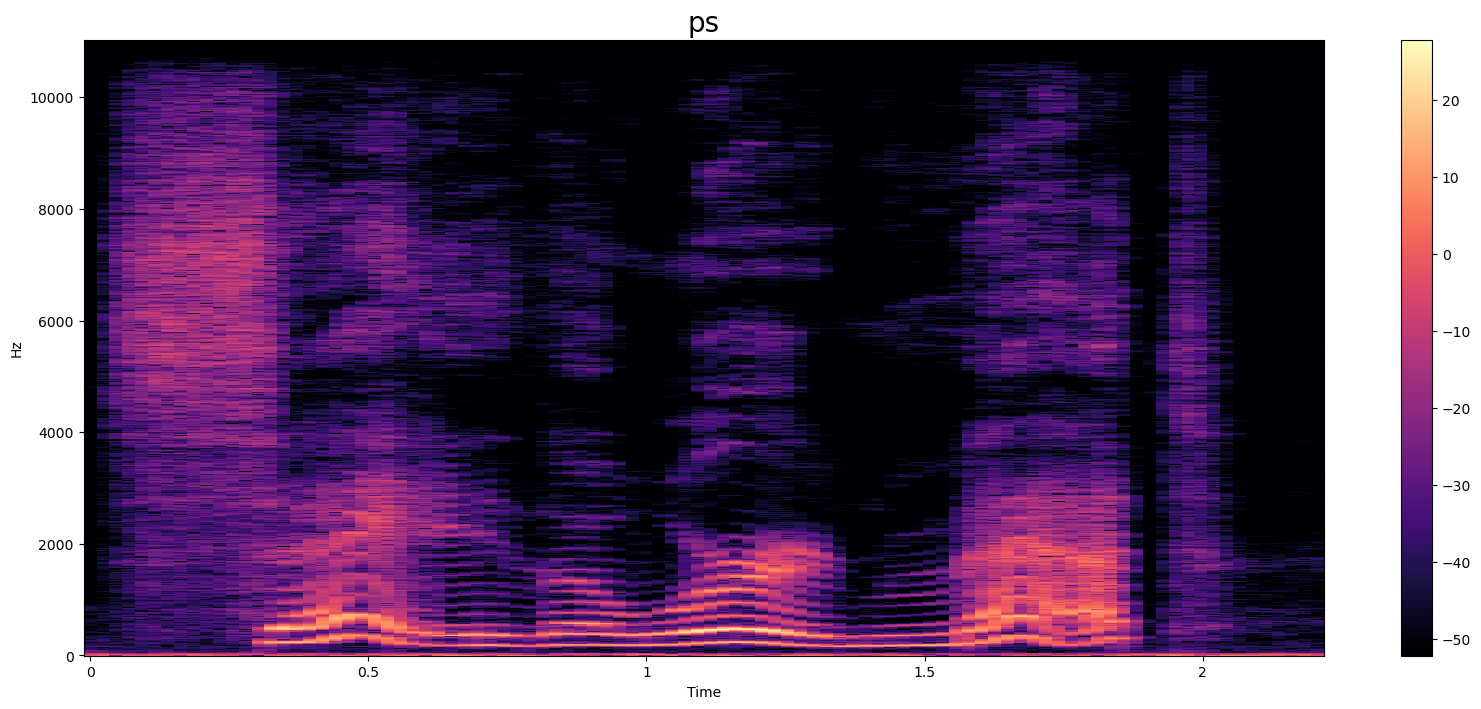

In [15]:
emotion = 'ps'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

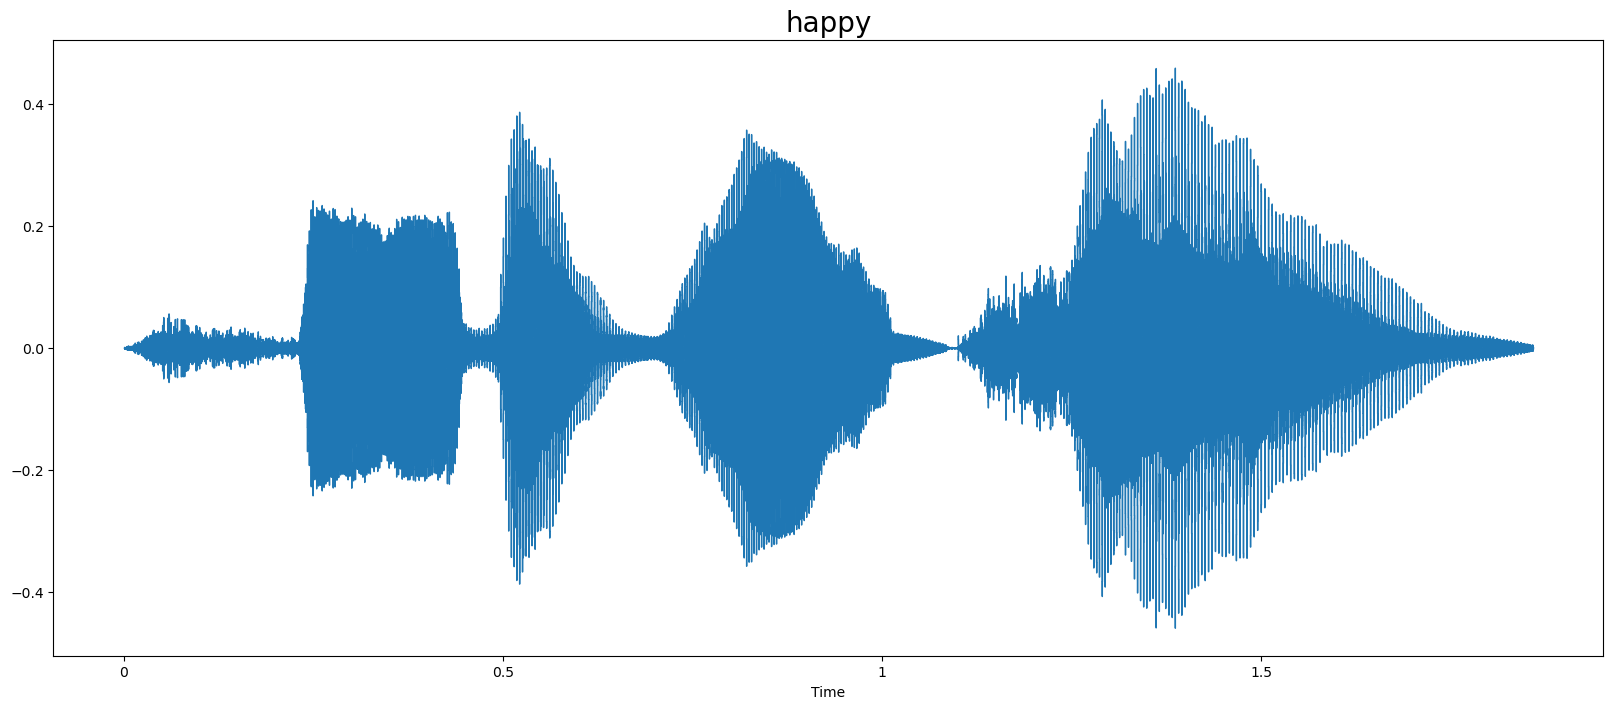

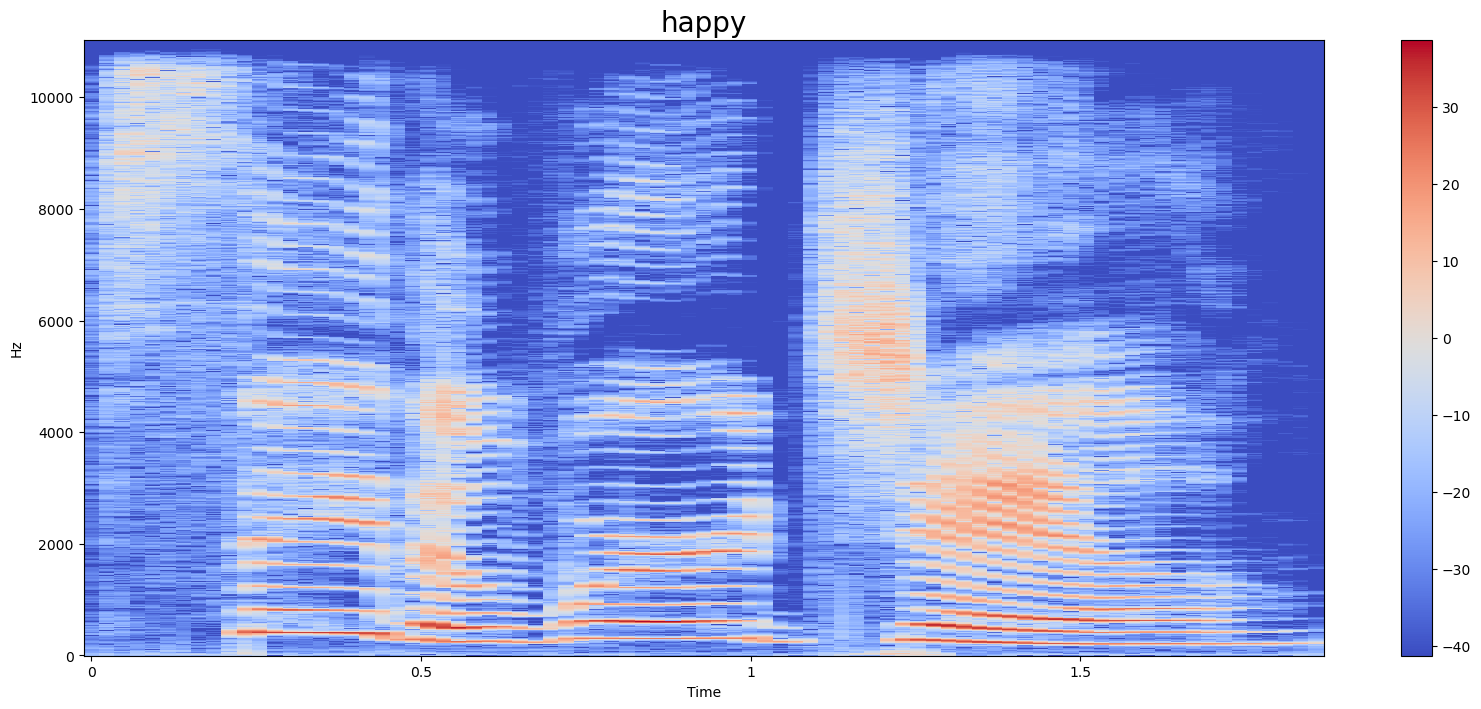

In [16]:
emotion = 'happy'
path = np.array(df['voice'][df['label'] == emotion])[0]
data,sampling_rate =librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

## Feature Extraction